<a href="https://colab.research.google.com/github/wasif31/Artificial-Intelligence-Course-Lab/blob/main/4.Implement_(02)_and_(03)_Using_Neural_Network_Techniques/02_Calculate_Air_Quality_Index_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Artificial Neural Networking
An artificial neuron network (ANN) is a computational model based on the structure and functions of biological neural networks. Information that flows through the network affects the structure of the ANN because a neural network changes - or learns, in a sense - based on that input and output.


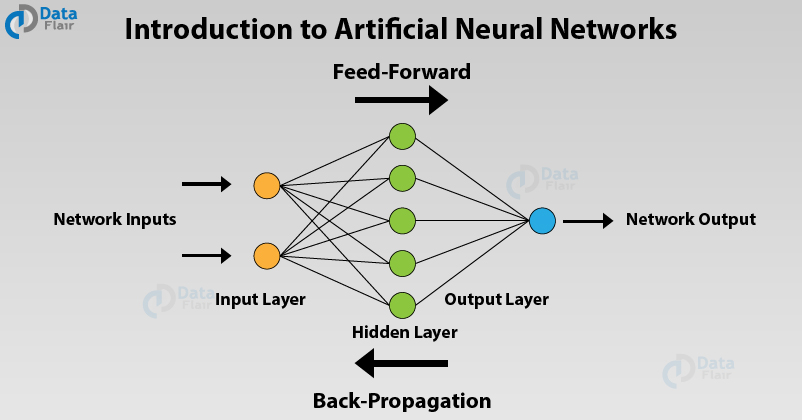


In [397]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.utils import shuffle
import warnings
# Modeling, Evaluation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import statsmodels.api as sm
#Validation
from sklearn.metrics import mean_squared_error
import pandas.util.testing as tm
#KBoost
from sklearn import metrics
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import SelectKBest,mutual_info_regression
from sklearn.model_selection import cross_val_score
#ANN Library
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [398]:
dataurl = 'https://raw.githubusercontent.com/wasif31/Artificial-Intelligence-Course-Lab/main/2.Calculate%20air%20quality%20index%20using%20Linear%20regression/RAW_DATASET_state_weather_aqi_data.csv'
dataframe1 = pd.read_csv(dataurl)
# Dataset is now stored in a Pandas Dataframe

In [399]:
dataframe1.head(10)

,state,city,station,date,time,PM2.5,PM10,NO2,NH3,SO2,CO,OZONE,AQI,Predominant_Parameter
0,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",03-01-2020,10:00:00,68.0,64.0,17.0,4.0,28.0,31.0,40.0,68.0,PM2.5
1,Andhra_Pradesh,Rajamahendravaram,"Anand Kala Kshetram, Rajamahendravaram - APPCB",03-01-2020,10:00:00,67.0,70.0,23.0,2.0,13.0,49.0,77.0,77.0,OZONE
2,Andhra_Pradesh,Tirupati,"Tirumala, Tirupati - APPCB",03-01-2020,10:00:00,32.0,NaN,26.0,5.0,6.0,19.0,16.0,32.0,PM2.5
3,Andhra_Pradesh,Visakhapatnam,"GVM Corporation, Visakhapatnam - APPCB",03-01-2020,10:00:00,93.0,93.0,31.0,3.0,9.0,57.0,61.0,93.0,PM10
4,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",05-01-2020,06:00:00,60.0,55.0,20.0,5.0,18.0,29.0,53.0,60.0,PM2.5
5,Andhra_Pradesh,Rajamahendravaram,"Anand Kala Kshetram, Rajamahendravaram - APPCB",05-01-2020,06:00:00,48.0,52.0,25.0,3.0,12.0,43.0,67.0,67.0,OZONE
6,Andhra_Pradesh,Tirupati,"Tirumala, Tirupati - APPCB",05-01-2020,06:00:00,36.0,41.0,31.0,5.0,5.0,33.0,14.0,41.0,PM10
7,Andhra_Pradesh,Visakhapatnam,"GVM Corporation, Visakhapatnam - APPCB",05-01-2020,06:00:00,27.0,43.0,23.0,3.0,11.0,44.0,61.0,61.0,OZONE
8,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",06-01-2020,03:00:00,54.0,54.0,15.0,5.0,21.0,30.0,51.0,54.0,PM10
9,Andhra_Pradesh,Rajamahendravaram,"Anand Kala Kshetram, Rajamahendravaram - APPCB",06-01-2020,03:00:00,48.0,53.0,24.0,3.0,13.0,39.0,69.0,69.0,OZONE


# Field Definations

*   id - unique identified for a house

*   PM2.5 - Fine particulate matter (PM2.5) is an air pollutant that is a concern for people's health when levels in air are high. PM2.5 are tiny particles in the air that reduce visibility and cause the air to appear hazy when levels are elevated.
Safe Level :
>35.5 to 55.4-Unhealthy for Sensitive Groups,
 >55.5 to 150.4-Unhealthy,
> 150.5 to 250.4-Very Unhealthy ,
>250.5 to 500.4-Hazardous.
*   PM10 - PM10 is particulate matter 10 micrometers or less in diameter,Safe Leve; as under 20 micrograms(W.H.O) per cubic metre. 


* NO2 -Nitrogen Dioxide

*   NH3 - Ammonia
*   CO - Carbon MonoOxide

*   SO2 - Sulpher Di Oxide

*   AQI - Air Quality Index (AQI)



In [400]:
dataframe1.shape
#number of rows,columns

(1573, 14)

In [401]:
dataframe1.isnull().sum()

state                      0
city                       0
station                    0
date                       0
time                       0
PM2.5                    181
PM10                     345
NO2                      158
NH3                      451
SO2                      216
CO                        65
OZONE                    151
AQI                        5
Predominant_Parameter    145
dtype: int64

In [402]:
dataframe1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  1573 non-null   object 
 1   city                   1573 non-null   object 
 2   station                1573 non-null   object 
 3   date                   1573 non-null   object 
 4   time                   1573 non-null   object 
 5   PM2.5                  1392 non-null   float64
 6   PM10                   1228 non-null   float64
 7   NO2                    1415 non-null   float64
 8   NH3                    1122 non-null   float64
 9   SO2                    1357 non-null   float64
 10  CO                     1508 non-null   float64
 11  OZONE                  1422 non-null   float64
 12  AQI                    1568 non-null   float64
 13  Predominant_Parameter  1428 non-null   object 
dtypes: float64(8), object(6)
memory usage: 172.2+ KB


In [403]:
dataframe1['date'] = pd.to_datetime(dataframe1['date'])

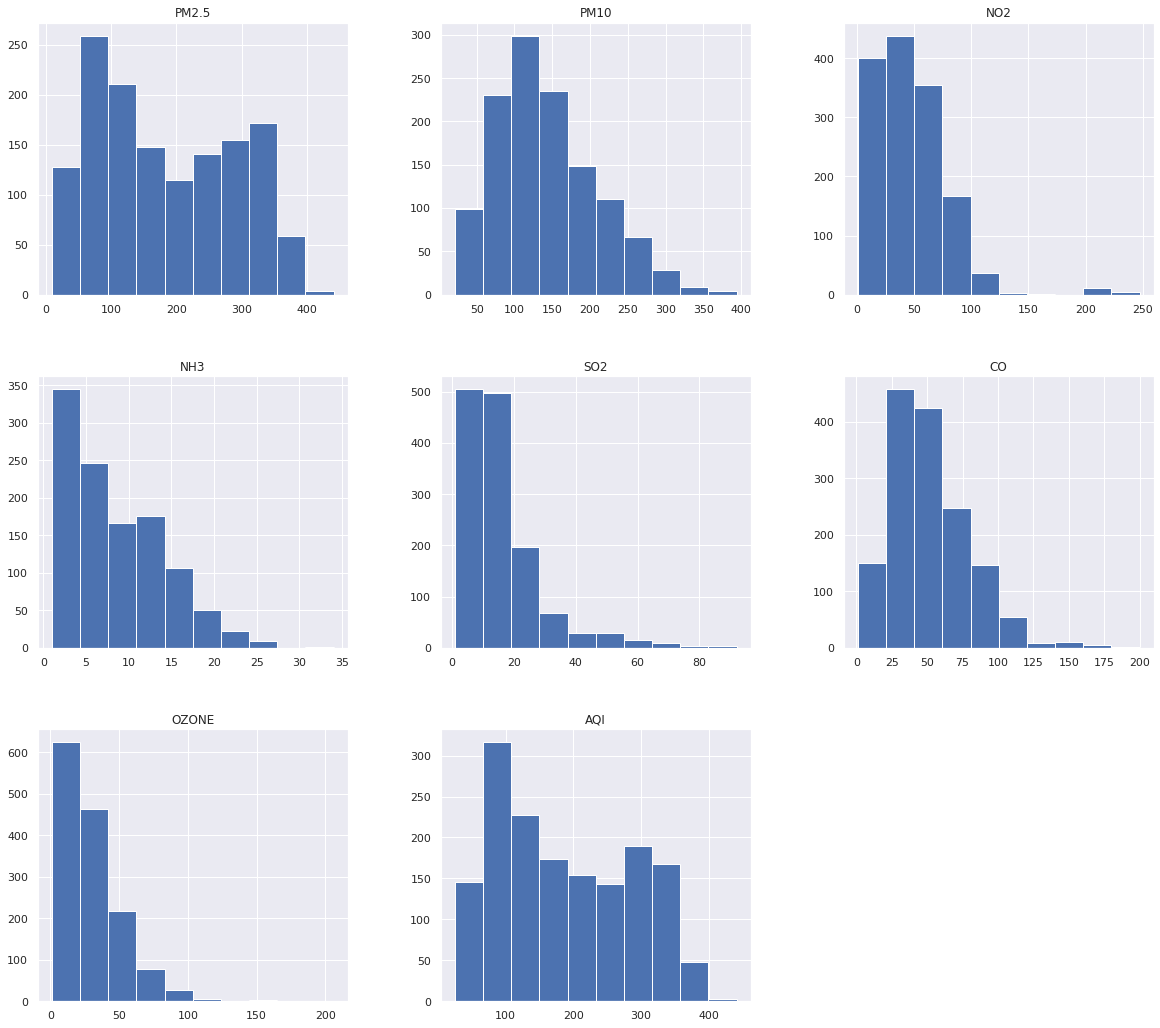

In [404]:
dataframe1.hist(figsize = (20,18));

In [405]:
dataframe1.columns

Index(['state', 'city', 'station', 'date', 'time', 'PM2.5', 'PM10', 'NO2',
       'NH3', 'SO2', 'CO', 'OZONE', 'AQI', 'Predominant_Parameter'],
      dtype='object')

In [406]:
dataframe1.drop(["state"],axis=1,inplace=True)
dataframe1.drop(["city"],axis=1,inplace=True)
dataframe1.drop(["station"],axis=1,inplace=True)
dataframe1.drop(["date"],axis=1,inplace=True)
dataframe1.drop(["time"],axis=1,inplace=True)
dataframe1.drop(["Predominant_Parameter"],axis=1,inplace=True)

In [407]:
dataframe1.head(10)

,PM2.5,PM10,NO2,NH3,SO2,CO,OZONE,AQI
0,68.0,64.0,17.0,4.0,28.0,31.0,40.0,68.0
1,67.0,70.0,23.0,2.0,13.0,49.0,77.0,77.0
2,32.0,NaN,26.0,5.0,6.0,19.0,16.0,32.0
3,93.0,93.0,31.0,3.0,9.0,57.0,61.0,93.0
4,60.0,55.0,20.0,5.0,18.0,29.0,53.0,60.0
5,48.0,52.0,25.0,3.0,12.0,43.0,67.0,67.0
6,36.0,41.0,31.0,5.0,5.0,33.0,14.0,41.0
7,27.0,43.0,23.0,3.0,11.0,44.0,61.0,61.0
8,54.0,54.0,15.0,5.0,21.0,30.0,51.0,54.0
9,48.0,53.0,24.0,3.0,13.0,39.0,69.0,69.0


In [408]:
dataframe2 = dataframe1[dataframe1['AQI'].notna()]

In [409]:
dataframe3 = dataframe2.fillna(dataframe2.mean())

In [410]:
dataframe4 = shuffle(dataframe3, random_state=0)
dataframe4 = dataframe4.reset_index(drop=True)

In [411]:
y = dataframe4["AQI"]
x = dataframe4
x.drop(["AQI","OZONE","PM10"],axis=1,inplace=True)
x.head()

,PM2.5,NO2,NH3,SO2,CO
0,182.898707,46.744681,8.409456,16.461538,46.0
1,47.000000,17.000000,7.000000,16.000000,51.0
2,319.000000,71.000000,8.409456,28.000000,86.0
3,71.000000,22.000000,2.000000,19.000000,19.0
4,281.000000,35.000000,2.000000,46.000000,92.0


In [412]:

from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)
print(model.feature_importances_)
x.head()

[0.88237487 0.03378041 0.02101873 0.01990886 0.04291712]


,PM2.5,NO2,NH3,SO2,CO
0,182.898707,46.744681,8.409456,16.461538,46.0
1,47.000000,17.000000,7.000000,16.000000,51.0
2,319.000000,71.000000,8.409456,28.000000,86.0
3,71.000000,22.000000,2.000000,19.000000,19.0
4,281.000000,35.000000,2.000000,46.000000,92.0


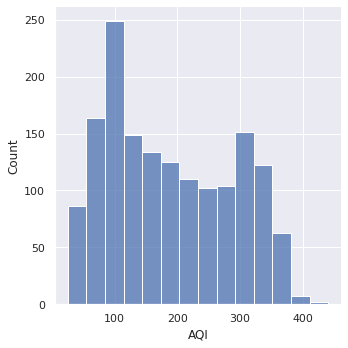

In [413]:
sns.displot(y)

In [414]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=.2, random_state=0)

In [415]:
X_Best = SelectKBest(mutual_info_regression, k=4).fit_transform(x, y)
print(X_Best.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X_Best, y, test_size=.3, random_state=0)

regressor = MLPRegressor()
regressor.fit(X_train,Y_train)
print(regressor.score(X_test,Y_test))
cross_val_score(regressor, X_train, Y_train, cv=7)

(1568, 4)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.8991185002382167


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


array([0.91093266, 0.92841489, 0.91118525, 0.90854576, 0.88904328,
       0.89827849, 0.80163318])

In [416]:
#Fitting ANN to Trining set
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=.2, random_state=0)
nuralNetworkModel = Sequential()
nuralNetworkModel.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))
nuralNetworkModel.add(Dense(256, kernel_initializer='normal',activation='relu'))
nuralNetworkModel.add(Dense(256, kernel_initializer='normal',activation='relu'))
nuralNetworkModel.add(Dense(256, kernel_initializer='normal',activation='relu'))
nuralNetworkModel.add(Dense(256, kernel_initializer='normal',activation='relu'))
nuralNetworkModel.add(Dense(256, kernel_initializer='normal',activation='relu'))
nuralNetworkModel.add(Dense(1, kernel_initializer='normal',activation='linear'))
nuralNetworkModel.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
nuralNetworkModel.summary()


Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_112 (Dense)            (None, 128)               768       
_________________________________________________________________
dense_113 (Dense)            (None, 256)               33024     
_________________________________________________________________
dense_114 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_115 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_116 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_117 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_118 (Dense)            (None, 1)               

In [417]:
nuralNetworkModel.fit(X_train, Y_train,validation_split=0.8)

8/8 [==============================] - 1s 41ms/step - loss: 186.4769 - mean_absolute_error: 186.4769 - val_loss: 118.1480 - val_mean_absolute_error: 118.1480


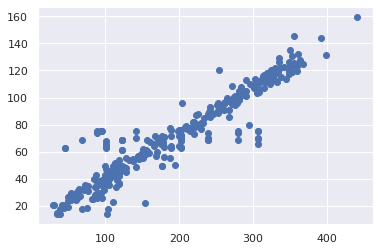

In [418]:
predictValues = nuralNetworkModel.predict(X_test)
plt.scatter(Y_test,predictValues)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


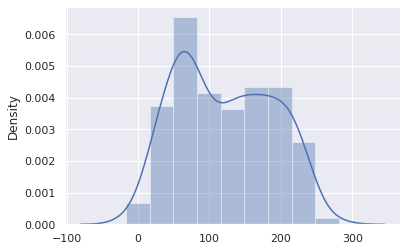

In [419]:
sns.distplot(Y_test.values.reshape(-1,1)-predictValues)

In [420]:
print('MAE:', metrics.mean_absolute_error(Y_test, predictValues))
print('MSE:', metrics.mean_squared_error(Y_test, predictValues))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictValues)))

MAE: 121.41715652320036
MSE: 19238.28397206374
RMSE: 138.7021411949496


In [421]:
model.score(X_test, Y_test) * 100

97.65503022892989